### **1. Import Libraries dan Load Dataset**

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df=pd.read_excel('dataset_polusi udara.xlsx')
df

,Temperature,Humidity,PM2.5,NO2,CO,Air Quality
0,29.8,59.1,5.2,18.9,1.72,Moderate
1,28.3,75.6,2.3,30.8,1.64,Moderate
2,23.1,74.7,26.7,24.4,1.63,Moderate
3,27.1,39.1,6.1,13.5,1.15,Good
4,26.5,70.7,6.9,21.9,1.01,Good
...,...,...,...,...,...,...
4995,40.6,74.1,116.0,45.5,2.11,Hazardous
4996,28.1,96.9,6.9,25.3,1.54,Moderate
4997,25.9,78.2,14.2,34.8,1.63,Moderate
4998,25.3,44.4,21.4,23.7,0.89,Good


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  5000 non-null   float64
 1   Humidity     5000 non-null   float64
 2   PM2.5        5000 non-null   float64
 3   NO2          5000 non-null   float64
 4   CO           5000 non-null   float64
 5   Air Quality  5000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 234.5+ KB


In [37]:
print(f"Jumlah data duplikat: {df.duplicated().sum()}")

Jumlah data duplikat: 0


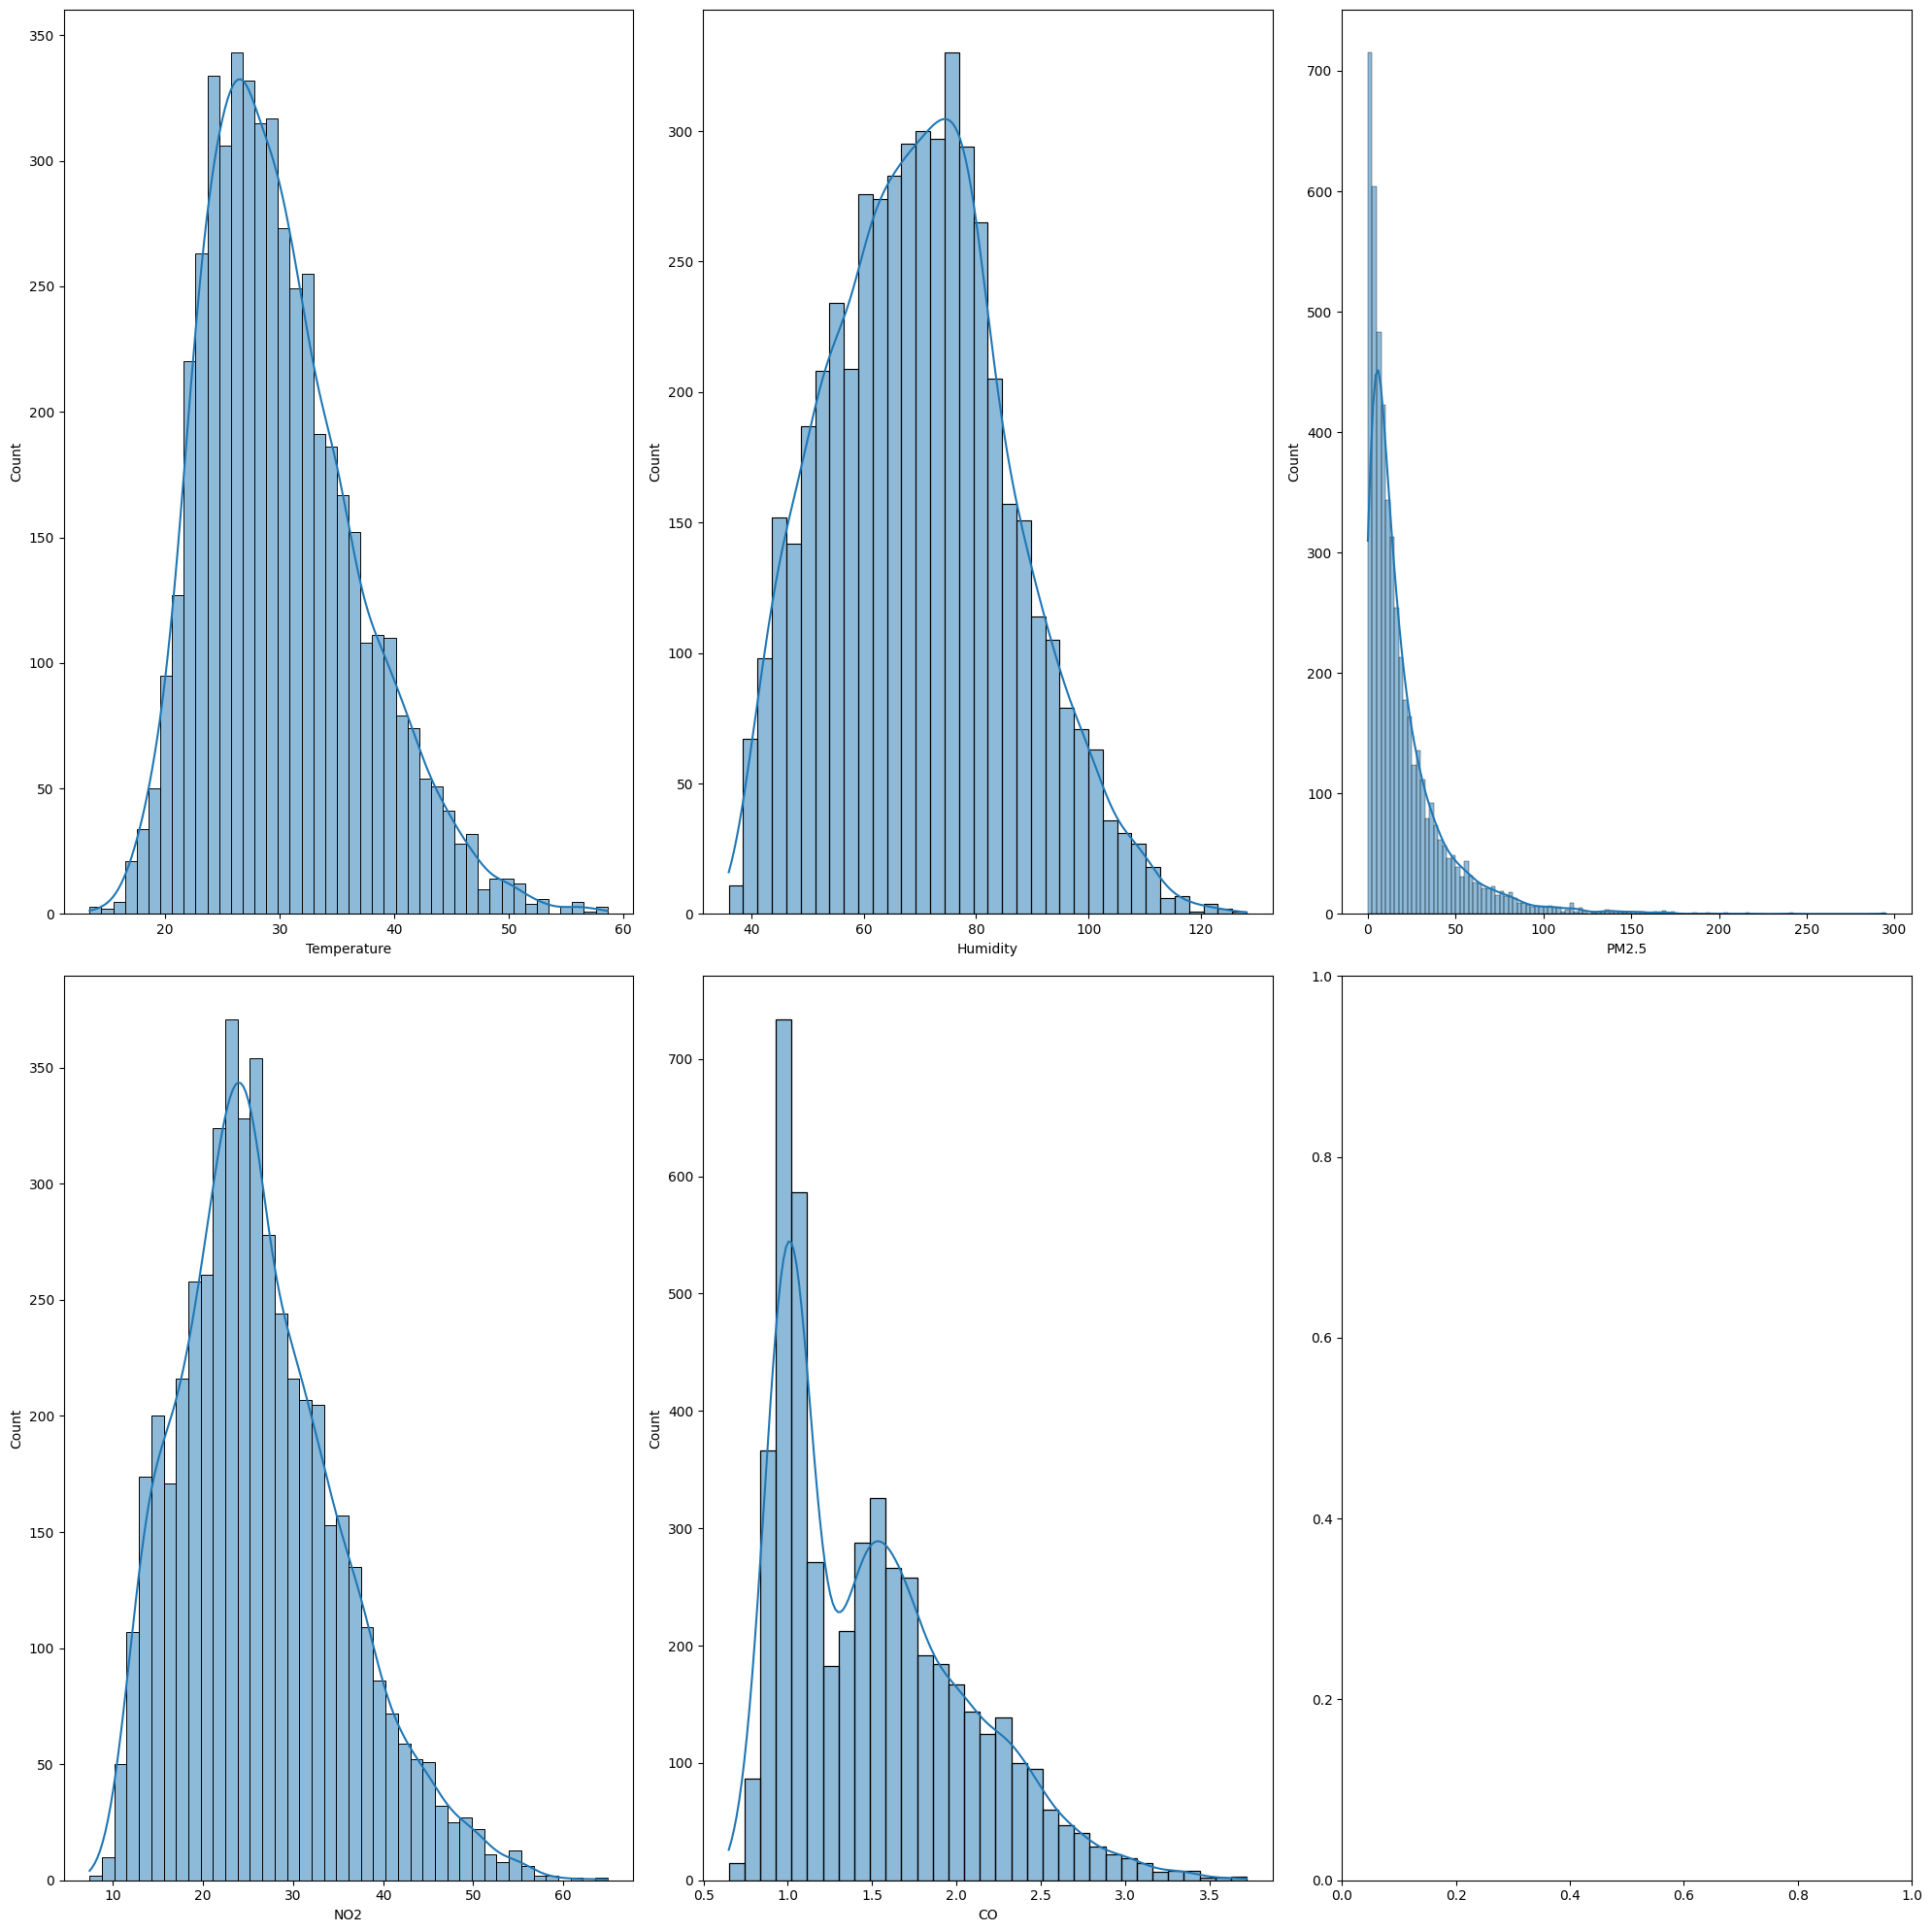

In [ ]:
fig,ax=plt.subplots(2, 3, figsize=(20,20))
ax=ax.flatten()
i=0

for col in df.columns:
    if(col!='Air Quality'):
        sns.histplot(data=df,x=col,kde=True,ax=ax[i])
        i+=1
plt.tight_layout()

In [39]:
df['Air Quality'].value_counts()

Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64

### **2. Preprocessing Data**

##### **Mapping Target** 

In [40]:
air_quality_map = {
    'Hazardous' : 0,
    'Poor' : 1,
    'Moderate': 2,
    'Good' : 3
}
df['Air Quality'] = df['Air Quality'].map(air_quality_map)
df['Air Quality'].value_counts()

Air Quality
3    2000
2    1500
1    1000
0     500
Name: count, dtype: int64

#### **Split Dataset**

In [41]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['Air Quality'])
y = df['Air Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)


### **3. Modelling**

#### **Random Forest**

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 8, max_depth=7, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=8, random_state=42)

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy Random Forest: {accuracy_rf}")

Accuracy Random Forest: 0.905


#### **Decision Tree**

In [44]:
from sklearn.tree import DecisionTreeClassifier

# Membuat dan melatih model Decision Tree
dt = DecisionTreeClassifier(max_depth= 9, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=42)

In [45]:
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy Decision Tree: {accuracy_dt}")

Accuracy Decision Tree: 0.885


#### **KNN**

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy KNN: {accuracy_knn}")

Accuracy KNN: 0.745


#### **SVM**

In [48]:
from sklearn import svm

svm_classifier = svm.SVC(kernel='linear', gamma=0.001)
svm_classifier.fit(X_train, y_train)

SVC(gamma=0.001, kernel='linear')

In [49]:
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy SVM: {accuracy_svm}")

Accuracy SVM: 0.912


### **4. Evaluation**

#### **Random Forest**

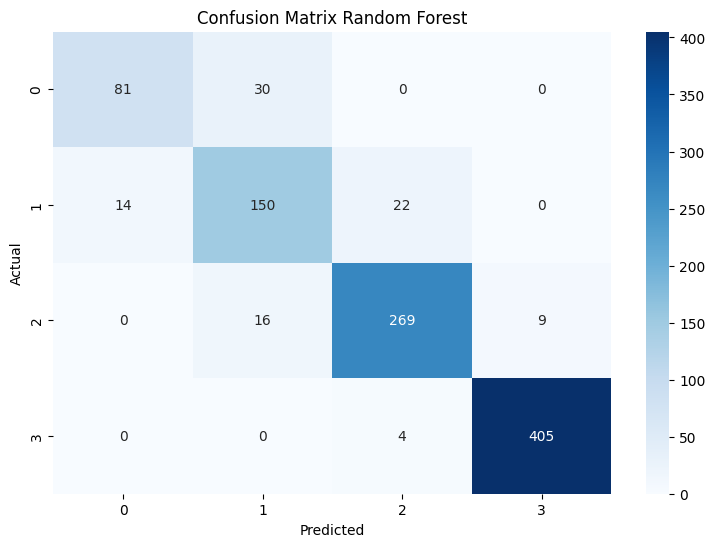

In [50]:
plt.figure(figsize=(9,6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Random Forest')

plt.show()

In [51]:
print("\nClassification Report Random Forest:\n", classification_report(y_test, y_pred_rf))


Classification Report Random Forest:
               precision    recall  f1-score   support

           0       0.85      0.73      0.79       111
           1       0.77      0.81      0.79       186
           2       0.91      0.91      0.91       294
           3       0.98      0.99      0.98       409

    accuracy                           0.91      1000
   macro avg       0.88      0.86      0.87      1000
weighted avg       0.91      0.91      0.90      1000



#### **Decision Tree**

Text(0.5, 1.0, 'Confusion Matrix Decision Tree')

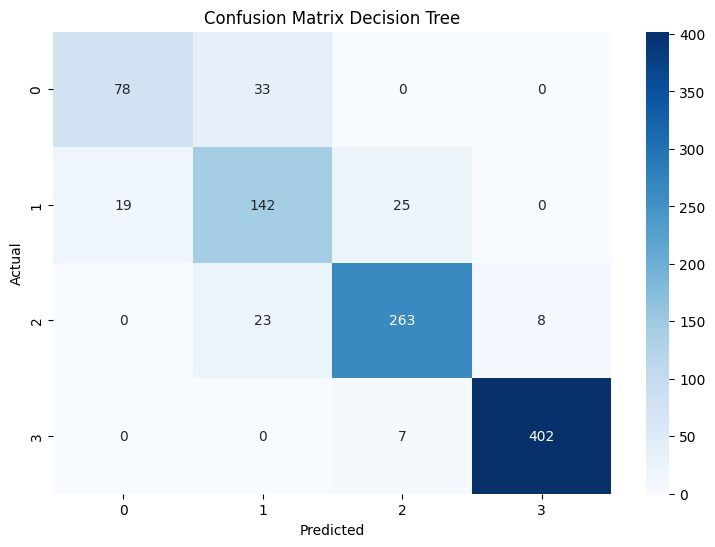

In [52]:
plt.figure(figsize=(9,6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Decision Tree')

In [53]:
print("\nClassification Report Decision Tree:\n", classification_report(y_test, y_pred_dt))


Classification Report Decision Tree:
               precision    recall  f1-score   support

           0       0.80      0.70      0.75       111
           1       0.72      0.76      0.74       186
           2       0.89      0.89      0.89       294
           3       0.98      0.98      0.98       409

    accuracy                           0.89      1000
   macro avg       0.85      0.84      0.84      1000
weighted avg       0.89      0.89      0.88      1000



#### **KNN**

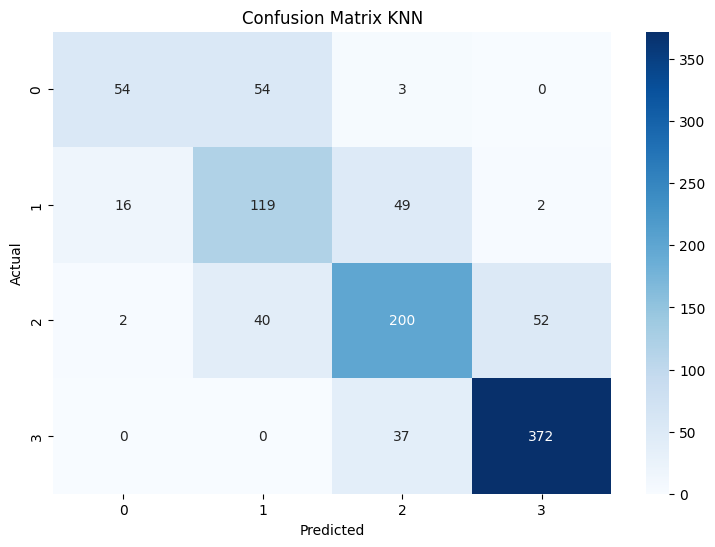

In [54]:
plt.figure(figsize=(9,6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN')

plt.show()

In [55]:
print("\nClassification Report KNN:\n", classification_report(y_test, y_pred_knn))


Classification Report KNN:
               precision    recall  f1-score   support

           0       0.75      0.49      0.59       111
           1       0.56      0.64      0.60       186
           2       0.69      0.68      0.69       294
           3       0.87      0.91      0.89       409

    accuracy                           0.74      1000
   macro avg       0.72      0.68      0.69      1000
weighted avg       0.75      0.74      0.74      1000



#### **SVM**

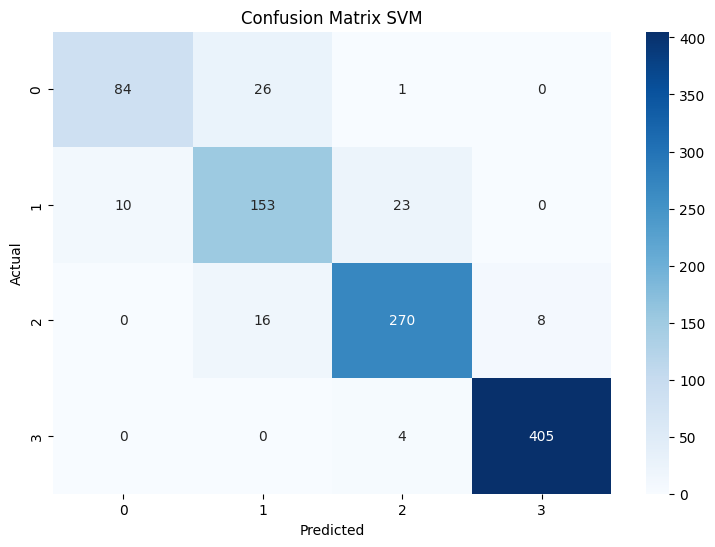

In [56]:
plt.figure(figsize=(9,6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM')

plt.show()

In [57]:
print("\nClassification Report SVM:\n", classification_report(y_test, y_pred_svm))


Classification Report SVM:
               precision    recall  f1-score   support

           0       0.89      0.76      0.82       111
           1       0.78      0.82      0.80       186
           2       0.91      0.92      0.91       294
           3       0.98      0.99      0.99       409

    accuracy                           0.91      1000
   macro avg       0.89      0.87      0.88      1000
weighted avg       0.91      0.91      0.91      1000



#### **Predict Model**

In [58]:
# Input data dan predict
input_data = np.array([[28, 20, 50, 1, 2]])  
prediction = svm_classifier.predict(input_data)

print("Hasil prediksi:", prediction[0])



Hasil prediksi: 2


c:\Users\Maulana Andhika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


### **5.Convert Model**

#### **Joblib**

In [59]:
import joblib
import os

joblib.dump(rf, "rf_model.pkl")

# Cek ukuran file
size_mb = os.path.getsize("rf_model.pkl") / (1024 * 1024)
print(f"Ukuran model: {size_mb:.2f} MB")

Ukuran model: 0.12 MB


In [60]:
joblib.dump(dt, "dt_model.pkl")

# Cek ukuran file
size_mb = os.path.getsize("dt_model.pkl") / (1024 * 1024)
print(f"Ukuran model: {size_mb:.2f} MB")

Ukuran model: 0.03 MB


In [61]:
joblib.dump(knn, "knn_model.pkl")

# Cek ukuran file
size_mb = os.path.getsize("knn_model.pkl") / (1024 * 1024)
print(f"Ukuran model: {size_mb:.2f} MB")

Ukuran model: 0.40 MB


In [62]:
joblib.dump(svm_classifier, "svm_model.pkl")

# Cek ukuran file
size_mb = os.path.getsize("svm_model.pkl") / (1024 * 1024)
print(f"Ukuran model: {size_mb:.2f} MB")

Ukuran model: 0.09 MB


#### **C_code**

In [63]:
from micromlgen import port

dt_model = joblib.load("dt_model.pkl")
c_code_dt = port(dt_model)

with open("DecisionTree.h", 'w') as f:
  f.write(c_code_dt)

In [64]:
rf_model = joblib.load("rf_model.pkl")
c_code_rf = port(rf_model)

with open("RandomForest.h", 'w') as f:
  f.write(c_code_rf)

In [65]:
svm_model = joblib.load("svm_model.pkl")
c_code_svm = port(svm_model)

with open("SVMClassifier.h", 'w') as f:
  f.write(c_code_svm)